<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/Tu%E1%BA%A7n_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=bad4f4b854a51ca1e30f42e9a656a5de1799be45c582acc2dde988ba1b71ece7
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-3-2ea66fde6dd8>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-2ea66fde6dd8>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-3-2ea66fde6dd8>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


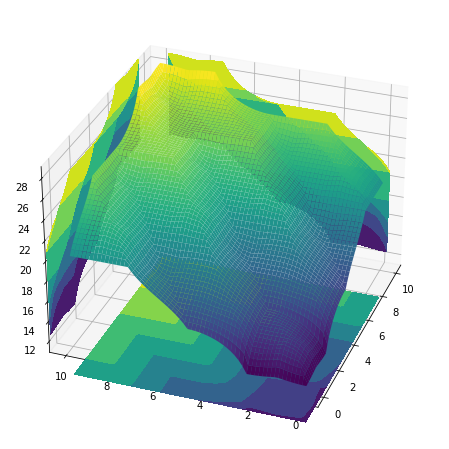

In [3]:

import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 30, 61)

food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')

#names = [1, 2, 3, 4, 5]
names = ['VP','P','AV','G','VG']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names) 

rule0 = ctrl.Rule(antecedent = ((food['VP'] & service['VP'])|(food['P'] & service['VP'])|(food['VP'] & service['P'])),
                  consequent = tip['VP'],label = 'ruleVP')
rule1 = ctrl.Rule(antecedent = ((food['AV'] & service['VP'])|(food['P'] & service['P'])|(food['VP'] & service['AV'])),
                  consequent = tip['P'],label = 'ruleP')
rule2 = ctrl.Rule(antecedent = ((food['G'] & service['VP'])|(food['AV'] & service['P'])|(food['P'] & service['AV'])|(food['VP'] & service['G'])|(food['VG'] & service['VP'])|(food['G'] & service['P'])|(food['AV'] & service['AV'])|(food['P'] & service['G'])|(food['VP'] & service['VG'])),
                  consequent = tip['AV'],label = 'ruleAV')
rule3 = ctrl.Rule(antecedent = ((food['VG'] & service['P'])|(food['G'] & service['AV'])|(food['AV'] & service['G'])|(food['P'] & service['VG'])|(food['VG'] & service['AV'])|(food['G'] & service['G'])|(food['AV'] & service['VG'])),
                  consequent = tip['G'],label = 'ruleG')
rule4 = ctrl.Rule(antecedent = ((food['VG'] & service['G'])|(food['G'] & service['VG'])|(food['VG'] & service['VG'])),
                  consequent = tip['VG'],label = 'ruleVG')
system = ctrl.ControlSystem(rules =[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 61*61+1)
unsampled = np.linspace(0,10,61)
x,y = np.meshgrid(unsampled,unsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61): 
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['tip']

fig = plt.figure(figsize = (8,8))  # Hinh 8x8
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)


55.95225280535148


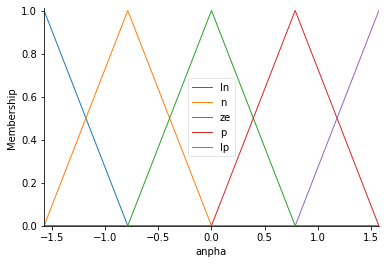

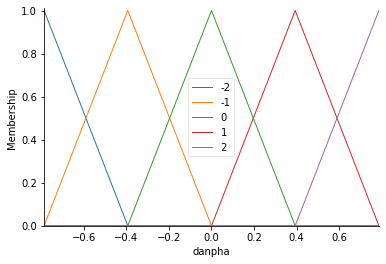

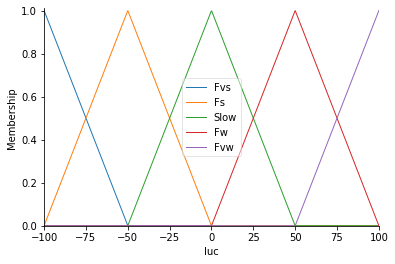

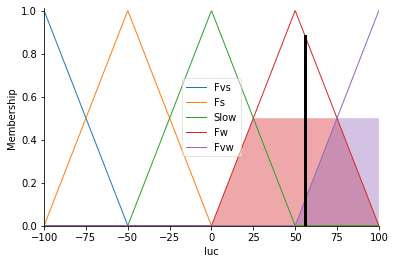

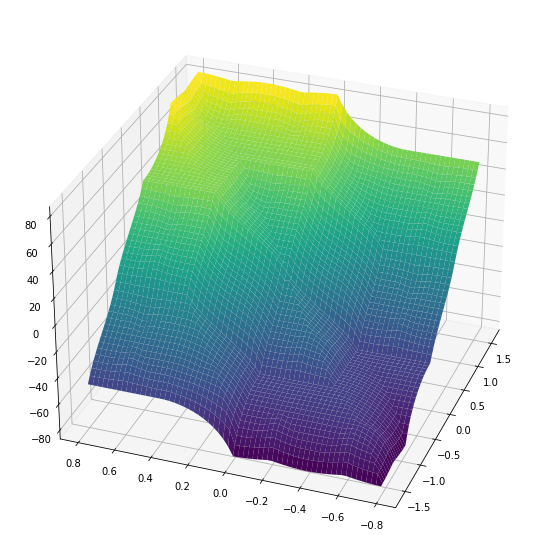

In [4]:
#con lac nguoc

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universea = np.linspace(-np.pi/2,np.pi/2,61)
universeda = np.linspace(-np.pi/4,np.pi/4,61)
universe1 = np.linspace(-100,100,1000)
#Input
a=ctrl.Antecedent(universea,'anpha')
da=ctrl.Antecedent(universeda,'danpha')
#Output
F=ctrl.Consequent(universe1,'luc')

namea=['ln','n','ze','p','lp']
nameda=['-2','-1','0','1','2']
namesT=['Fvs','Fs','Slow','Fw','Fvw']

a.automf(names=namea)
da.automf(names=nameda)
F.automf(names=namesT)

a.view()
da.view()
F.view()

rule = []

rule.append(ctrl.Rule(antecedent=((a['ln'] & da['-2'])|(a['ln'] & da['-1'])|(a['ln'] & da['0'])|
                                  (a['n'] & da['-2'])),consequent=F['Fvs'],label='rule Fvs'))
rule.append(ctrl.Rule(antecedent=((a['ze'] & da['-2'])|(a['n'] & da['-1'])|(a['ze'] & da['-1'])|
                                  (a['n'] & da['0'])|(a['ln'] & da['1'])|(a['ln'] & da['2'])),consequent=F['Fs'],label='rule Fs'))
rule.append(ctrl.Rule(antecedent=((a['p'] & da['-2'])|(a['p'] & da['-1'])|(a['ze'] & da['0'])|
                                  (a['n'] & da['1'])|(a['n'] & da['2'])),consequent=F['Slow'],label='rule Slow'))
rule.append(ctrl.Rule(antecedent=((a['lp'] & da['-2'])|(a['lp'] & da['-1'])|(a['p'] & da['0'])|
                                  (a['p'] & da['1'])|(a['ze'] & da['1'])|(a['ze'] & da['2'])),consequent=F['Fw'],label='rule Fw'))
rule.append(ctrl.Rule(antecedent=((a['lp'] & da['0'])|(a['lp'] & da['1'])|(a['lp'] & da['2'])|(a['p'] & da['2'])),consequent=F['Fvw'],label='rule Fvw'))
#Control system
F_ctrl = ctrl.ControlSystem(rule)
Force_sim=ctrl.ControlSystemSimulation(F_ctrl)

Force_sim.input['anpha'] = np.pi/8
Force_sim.input['danpha'] = 1
Force_sim.compute()
print(Force_sim.output['luc'])
F.view(sim = Force_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-np.pi/2,np.pi/2,61)
upsampled2=np.linspace(-np.pi/4,np.pi/4,61)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    d_simulation.input['anpha']=x[i,j]
    d_simulation.input['danpha']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['luc']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)

59.75468975468975


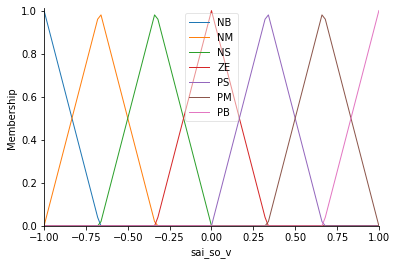

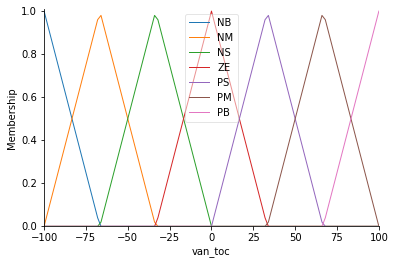

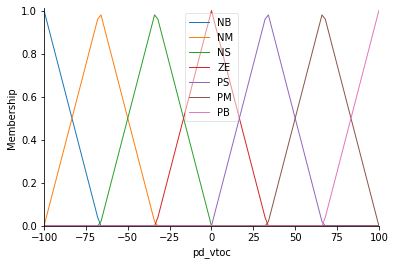

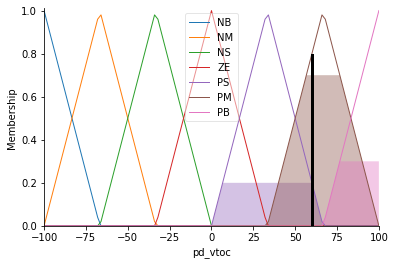

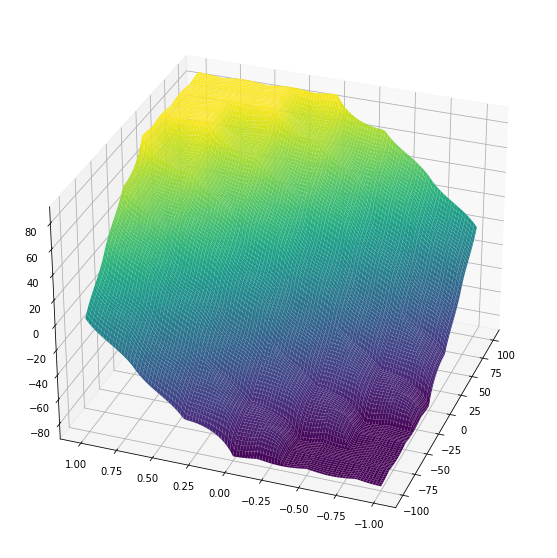

In [5]:
# đk motor servo
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe0 = np.linspace(-100,100,101)
universe1 = np.linspace(-1,1,101)
universe2 = np.linspace(-100,100,101)
#Input
E =ctrl.Antecedent(universe0,'van_toc')
CE=ctrl.Antecedent(universe1,'sai_so_v')
#Output
SP=ctrl.Consequent(universe2,'pd_vtoc')

name=['NB','NM','NS','ZE','PS','PM','PB']

CE.automf(names=name)
E.automf(names=name)
SP.automf(names=name)

CE.view()
E.view()
SP.view()

rule = []

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['NB'])|(CE['NB'] & E['NM'])|
                                  (CE['NB'] & E['NS'])|(CE['NB'] & E['ZE'])|
                                  (CE['NM'] & E['NB'])|(CE['NM'] & E['NM'])|
                                  (CE['NM'] & E['NS'])|(CE['NS'] & E['NB'])|
                                  (CE['NS'] & E['NM'])|(CE['ZE'] & E['NB']))
                                  ,consequent=SP['NB'],label='rule NB'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PS'])|(CE['NM'] & E['ZE'])|
                                  (CE['NS'] & E['NS'])|(CE['ZE'] & E['NM'])|
                                  (CE['PS'] & E['NB'])),consequent=SP['NM'],label='rule NM'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PM'])|(CE['NM'] & E['PS'])|
                                  (CE['NS'] & E['ZE'])|(CE['ZE'] & E['NS'])|
                                  (CE['PS'] & E['NM'])|(CE['PM'] & E['NB']))
                                  ,consequent=SP['NS'],label='rule NS'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PB'])|(CE['NM'] & E['PM'])|
                                  (CE['NS'] & E['PS'])|(CE['ZE'] & E['ZE'])|
                                  (CE['PS'] & E['NS'])|(CE['PM'] & E['NM'])|
                                  (CE['PB'] & E['NB'])),consequent=SP['ZE'],label='rule ZE'))

rule.append(ctrl.Rule(antecedent=((CE['NM'] & E['PB'])|(CE['NS'] & E['PM'])|
                                  (CE['ZE'] & E['PS'])|(CE['PS'] & E['ZE'])|
                                  (CE['PM'] & E['NS'])|(CE['PB'] & E['NM']))
                                  ,consequent=SP['PS'],label='rule PS'))

rule.append(ctrl.Rule(antecedent=((CE['NS'] & E['PB'])|(CE['ZE'] & E['PM'])|
                                  (CE['PS'] & E['PS'])|(CE['PM'] & E['ZE'])|
                                  (CE['PB'] & E['NS'])),consequent=SP['PM'],label='rule PM'))

rule.append(ctrl.Rule(antecedent=((CE['PB'] & E['PB'])|(CE['PM'] & E['PB'])|
                                  (CE['PS'] & E['PB'])|(CE['ZE'] & E['PB'])|
                                  (CE['PB'] & E['PM'])|(CE['PM'] & E['PM'])|
                                  (CE['PS'] & E['PM'])|(CE['PB'] & E['PS'])|
                                  (CE['PM'] & E['PS'])|(CE['PB'] & E['ZE']))
                                  ,consequent=SP['PB'],label='rule PB'))

#Control system
SPEED_ctrl = ctrl.ControlSystem(rule)
SP_sim=ctrl.ControlSystemSimulation(SPEED_ctrl)

SP_sim.input['van_toc'] = 60
SP_sim.input['sai_so_v'] = 0.1
SP_sim.compute()
print(SP_sim.output['pd_vtoc'])
SP.view(sim = SP_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-100,100,101)
upsampled2=np.linspace(-1,1,101)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    d_simulation.input['van_toc']=x[i,j]
    d_simulation.input['sai_so_v']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['pd_vtoc']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)

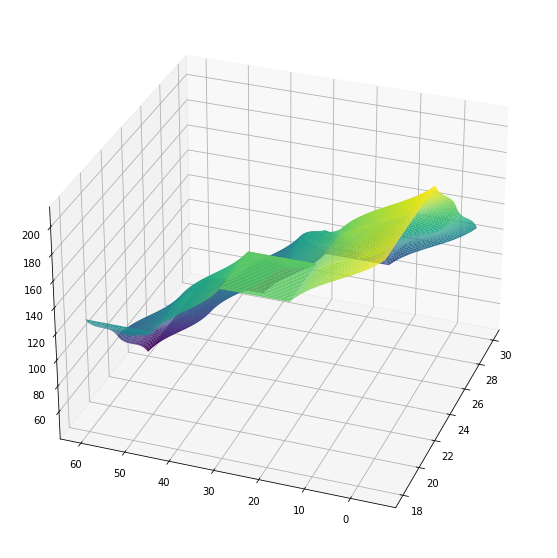

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Ve do thi 3D

universe1 = np.linspace(18,30,121)
universe2 = np.linspace(-5,60,131)
universe3 = np.linspace(0,255,256)


sp = ctrl.Antecedent(universe1,'sp')
sensor = ctrl.Antecedent(universe2,'sensor')
pwm = ctrl.Consequent(universe3,'pwm')


sp['1'] = fuzz.trimf(sp.universe,[18,18,21])
sp['2'] = fuzz.trimf(sp.universe,[18,21,24])
sp['3'] = fuzz.trimf(sp.universe,[21,24,27])
sp['4'] = fuzz.trimf(sp.universe,[24,27,30])
sp['5'] = fuzz.trimf(sp.universe,[27,30,30])

sensor['1'] = fuzz.trimf(sensor.universe,[-5,-5,15])
sensor['2'] = fuzz.trimf(sensor.universe,[-5,15,30])
sensor['3'] = fuzz.trimf(sensor.universe,[15,30,45])
sensor['4'] = fuzz.trimf(sensor.universe,[30,45,60])
sensor['5'] = fuzz.trimf(sensor.universe,[45,60,60])

pwm['1'] = fuzz.trimf(pwm.universe,[0,42,84])
pwm['2'] = fuzz.trimf(pwm.universe,[42,84,126])
pwm['3'] = fuzz.trimf(pwm.universe,[84,126,168])
pwm['4'] = fuzz.trimf(pwm.universe,[126,168,210])
pwm['5'] = fuzz.trimf(pwm.universe,[168,210,255])

rule0 = ctrl.Rule(antecedent = ((sp['5'] & sensor['4'])|(sp['3'] & sensor['5'])
                              |(sp['4'] & sensor['5'])|(sp['5'] & sensor['5'])),
                              consequent = pwm['1'],label = 'rule_1')
rule1 = ctrl.Rule(antecedent = ((sp['5'] & sensor['2'])|(sp['5'] & sensor['3'])
                              |(sp['3'] & sensor['4'])|(sp['4'] & sensor['4'])|
                              (sp['2'] & sensor['5'])),
                              consequent = pwm['2'],label = 'rule_2')
rule2 = ctrl.Rule(antecedent = ((sp['5'] & sensor['1'])|(sp['4'] & sensor['2'])
                              |(sp['3'] & sensor['3'])|(sp['4'] & sensor['3'])|
                              (sp['1'] & sensor['4'])|(sp['2'] & sensor['4'])|
                              (sp['1'] & sensor['5'])),
                              consequent = pwm['3'],label = 'rule_3')

rule3 = ctrl.Rule(antecedent = ((sp['4'] & sensor['1'])|(sp['1'] & sensor['2'])
                              |(sp['2'] & sensor['2'])|(sp['3'] & sensor['2'])|
                              (sp['1'] & sensor['3'])|(sp['2'] & sensor['3'])),
                              consequent = pwm['4'],label = 'rule_4')

rule4 = ctrl.Rule(antecedent = ((sp['1'] & sensor['1'])|(sp['2'] & sensor['1'])
                              |(sp['3'] & sensor['1'])),
                              consequent = pwm['5'],label = 'rule_5')

system = ctrl.ControlSystem(rules =[rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system)
unsampled1 = np.linspace(18,30,121)
unsampled2 = np.linspace(-5,60,131)
x,y = np.meshgrid(unsampled1,unsampled2)
z = np.zeros_like(x)

for i in range(131):
  for j in range(121): 
    sim.input['sp'] = x[i,j]
    sim.input['sensor'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['pwm']

     

fig = plt.figure(figsize = (10,10))  # Hinh 8x8
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
#cset = ax.contourf(x,y,z,zdir = 'z', offset = 8, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z,zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
#cset = ax.contourf(x,y,z,zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)